##### Copyright 2019 The TensorFlow Authors.

In [203]:
import os
import numpy as np
from PIL import Image
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [204]:
cwd = os.getcwd()

def preprocess_image(img_path):
    """Resize the image to (32, 32) and keep RGB channels."""
    try:
        img = Image.open(img_path).resize((32, 32))
        if img.mode != 'RGB':
            img = img.convert('RGB')  # Ensure image is in RGB mode
        return np.array(img)
    except Exception as e:
        print(f"Error processing {img_path}: {e}")
        return None

# Preprocess training data
train_img_folder = '/visual_results_train(2561)'
train_img_direc = cwd + train_img_folder
train_array_list = [preprocess_image(os.path.join(train_img_direc, img)) for img in os.listdir(train_img_direc)]
train_img_array = np.stack(train_array_list)
print(train_img_array.shape)

# Preprocess test data
test_img_folder = '/visual_results_test(656)'  
test_img_direc = cwd + test_img_folder
test_array_list = [preprocess_image(os.path.join(test_img_direc, img)) for img in os.listdir(test_img_direc)]
test_img_array = np.stack(test_array_list)
print(test_img_array.shape)



(2561, 32, 32, 3)
(656, 32, 32, 3)


In [208]:
import pandas as pd
import ast

def load_scp_codes_from_ptbxl(ptbxl_database):
    """Load unique scp_codes (labels) from a CSV file."""
    df = pd.read_csv(ptbxl_database)
    # Extract unique scp_codes and convert them to a list
    return df['scp_codes'].dropna().unique().astype(str).tolist()



def extract_string_from_scp_codes(s):
    """Extract diagnostic codes from a string representation of a dictionary."""
    try:
        # Convert string to dictionary
        code_dict = ast.literal_eval(s)
        # Extract keys (diagnostic codes) that have a non-zero value
        return [key for key, value in code_dict.items() if value > 0.0]
    except:
        return []





In [209]:
def load_ecg_id_from_ptbxl(ptbxl_database):
    """Load unique ecg_id (labels) from a CSV file."""
    df = pd.read_csv(ptbxl_database)
    # Extract unique ecg_id and convert them to a list
    return df['ecg_id'].dropna().tolist()

def load_common_ecg_id_scp_codes(ptbxl_database):
    """Load mapping of scp_codes to diagnostic_class."""
    df = pd.read_csv(ptbxl_database)
    return df.set_index('ecg_id')['scp_codes'].to_dict()

# Assuming there's a CSV (like scp_statements.csv) that maps scp_codes to their human-readable diagnostic classes
def load_mapping_from_scp_statements(scp_statements):
    df = pd.read_csv(scp_statements)
    return df.set_index('scp_codes')['diagnostic_class'].to_dict()


In [210]:
# Load the data
scp_codes_unrefined = load_scp_codes_from_ptbxl('ptbxl_database.csv')
all_extracted_codes = [extract_string_from_scp_codes(code) for code in scp_codes_unrefined]

common = load_common_ecg_id_scp_codes('ptbxl_database.csv')

# Assuming you have a CSV that contains the mapping from scp_codes to diagnostic classes
mapping = load_mapping_from_scp_statements('scp_statements.csv')

# Demonstration outputs
print(scp_codes_unrefined)
print(all_extracted_codes)
print(common)
print(mapping)

["{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}", "{'NORM': 80.0, 'SBRAD': 0.0}", "{'NORM': 100.0, 'SR': 0.0}", "{'IMI': 35.0, 'ABQRS': 0.0, 'SR': 0.0}", "{'NORM': 80.0, 'SARRH': 0.0}", "{'NORM': 100.0, 'SARRH': 0.0}", "{'AFLT': 100.0, 'ABQRS': 0.0, 'AFIB': 0.0}", "{'AFLT': 100.0}", "{'AFLT': 100.0, 'ABQRS': 0.0}", "{'NDT': 100.0, 'SR': 0.0}", "{'NST_': 100.0, 'DIG': 100.0, 'SR': 0.0}", "{'NORM': 80.0, 'SR': 0.0}", "{'LVH': 100.0, 'SR': 0.0}", "{'LPFB': 100.0, 'SR': 0.0}", "{'IMI': 15.0, 'LNGQT': 100.0, 'NST_': 100.0, 'DIG': 100.0, 'ABQRS': 0.0, 'SR': 0.0}", "{'LAFB': 100.0, 'SR': 0.0}", "{'IRBBB': 100.0, 'RAO/RAE': 50.0, 'RVH': 35.0, 'SR': 0.0}", "{'IVCD': 100.0, 'SR': 0.0}", "{'LMI': 15.0, 'IVCD': 100.0, 'SR': 0.0}", "{'IRBBB': 100.0, 'SR': 0.0}", "{'NORM': 100.0, 'ABQRS': 0.0, 'SR': 0.0}", "{'ASMI': 15.0, 'ABQRS': 0.0, 'SR': 0.0}", "{'NORM': 100.0, 'SBRAD': 0.0}", "{'AMI': 50.0, 'IRBBB': 100.0, 'SR': 0.0}", "{'NDT': 100.0, 'IRBBB': 100.0, 'SR': 0.0}", "{'ISCAL': 50.0, '1AVB': 100.0, 'SR'

In [248]:
def main_extracted_code(s):
    """Extract the primary diagnostic code from the string."""
    codes = load_mapping_from_scp_statements(s)
    if codes:
        return codes[0]
    return None

result = {i+1: main_extracted_code(s) for i, s in enumerate(scp_codes_unrefined)}

print(result)


OSError: [Errno 22] Invalid argument: "{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}"

In [247]:
VALID_CLASSES = ['NORM', 'STTC', 'CD', 'IMI', 'HYP']

def main_extracted_code(s):
    """Extract the primary diagnostic code from the string that is in the VALID_CLASSES."""
    codes = extract_string_from_scp_codes(s)
    for code in codes:
        if code in VALID_CLASSES:
            return code
    return None

result = {i+1: main_extracted_code(s) for i, s in enumerate(scp_codes_unrefined)}

print(result)


{1: 'NORM', 2: 'NORM', 3: 'NORM', 4: 'IMI', 5: 'NORM', 6: 'NORM', 7: None, 8: None, 9: None, 10: None, 11: None, 12: 'NORM', 13: None, 14: None, 15: 'IMI', 16: None, 17: None, 18: None, 19: None, 20: None, 21: 'NORM', 22: None, 23: 'NORM', 24: None, 25: None, 26: None, 27: 'IMI', 28: None, 29: 'NORM', 30: None, 31: None, 32: None, 33: None, 34: 'IMI', 35: 'NORM', 36: None, 37: 'IMI', 38: None, 39: None, 40: 'IMI', 41: None, 42: None, 43: None, 44: None, 45: None, 46: None, 47: None, 48: None, 49: None, 50: 'IMI', 51: None, 52: None, 53: None, 54: None, 55: None, 56: 'NORM', 57: None, 58: None, 59: 'NORM', 60: None, 61: 'IMI', 62: None, 63: 'NORM', 64: 'NORM', 65: None, 66: None, 67: None, 68: 'IMI', 69: 'NORM', 70: 'NORM', 71: 'IMI', 72: None, 73: None, 74: 'IMI', 75: 'IMI', 76: None, 77: None, 78: None, 79: 'NORM', 80: 'IMI', 81: 'IMI', 82: 'IMI', 83: 'IMI', 84: None, 85: None, 86: None, 87: None, 88: 'NORM', 89: None, 90: 'IMI', 91: None, 92: None, 93: None, 94: 'NORM', 95: 'IMI', 96

In [242]:


# Map the scp_codes in train_labels and test_labels to their diagnostic class using the mapping dictionary
mapped_train_labels = [result.get(str(train_img_array)) for train_img_array in train_img_folder]
mapped_test_labels = [result.get(str(test_img_array)) for test_img_array in test_img_folder]
print(mapped_train_labels)
print(mapped_test_labels)







[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [139]:
# Print Type and Shape Information
print("Type of train_img_array:", type(train_img_array))
print("Type of test_img_array:", type(test_img_array))
print("Shape of train_img_array:", train_img_array.shape)
print("Shape of test_img_array:", test_img_array.shape)
print("Type of train_labels:", type(train_labels))
print("Type of test_labels:", type(test_labels))
print("Shape of train_labels:", train_labels.shape)
print("Shape of test_labels:", test_labels.shape)
print(train_labels)
print(test_labels)
# Normalize pixel values to be between 0 and 1
train_images = train_img_array / 255.0
test_images = test_img_array / 255.0

# Print shapes after normalization
print("Shape of normalized train_images:", train_images.shape)
print("Shape of normalized test_images:", test_images.shape)



Type of train_img_array: <class 'numpy.ndarray'>
Type of test_img_array: <class 'numpy.ndarray'>
Shape of train_img_array: (2561, 32, 32, 3)
Shape of test_img_array: (656, 32, 32, 3)
Type of train_labels: <class 'numpy.ndarray'>
Type of test_labels: <class 'numpy.ndarray'>
Shape of train_labels: (2561,)
Shape of test_labels: (656,)
[-1 -1 -1 ... -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 

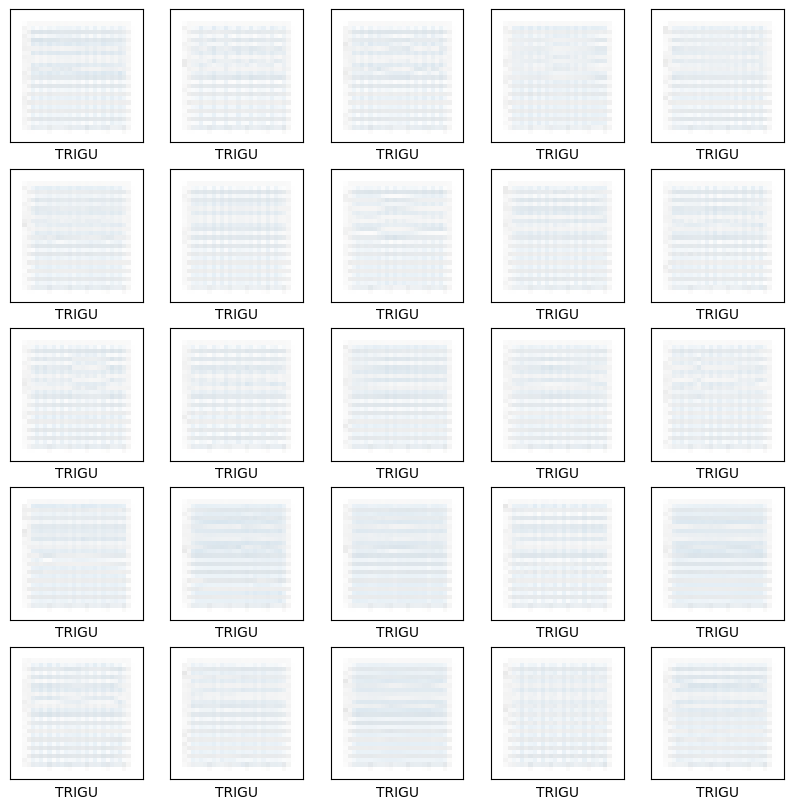

In [123]:

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img_array[i])
    plt.xlabel(diagnostic_class[train_labels[i]])
plt.show()

### Create the convolutional base

The 6 lines of code below define the convolutional base using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument `input_shape` to your first layer.


In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Let's display the architecture of your model so far:

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically,  as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

### Add Dense layers on top

To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D,  then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

In [32]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5))

Here's the complete architecture of your model:

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

The network summary shows that (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

### Compile and train the model

In [34]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_img_array, train_ans_array, epochs=10, validation_data=(test_img_array, test_ans_array))

Epoch 1/10
81/81 [==============================] - 2s 10ms/step - loss: 1.6095 - accuracy: 0.2163 - val_loss: 1.6082 - val_accuracy: 0.2287
Epoch 2/10
81/81 [==============================] - 1s 8ms/step - loss: 1.6080 - accuracy: 0.2198 - val_loss: 1.6086 - val_accuracy: 0.2287
Epoch 3/10
81/81 [==============================] - 1s 8ms/step - loss: 1.6077 - accuracy: 0.2198 - val_loss: 1.6092 - val_accuracy: 0.2287
Epoch 4/10
81/81 [==============================] - 1s 8ms/step - loss: 1.6076 - accuracy: 0.2198 - val_loss: 1.6098 - val_accuracy: 0.2287
Epoch 5/10
81/81 [==============================] - 1s 8ms/step - loss: 1.6075 - accuracy: 0.2198 - val_loss: 1.6088 - val_accuracy: 0.2287
Epoch 6/10
81/81 [==============================] - 1s 8ms/step - loss: 1.6076 - accuracy: 0.2198 - val_loss: 1.6106 - val_accuracy: 0.2287
Epoch 7/10
81/81 [==============================] - 1s 8ms/step - loss: 1.6076 - accuracy: 0.2073 - val_loss: 1.6096 - val_accuracy: 0.2287
Epoch 8/10
81/81 [=

### Evaluate the model

21/21 - 0s - loss: 1.6395 - accuracy: 0.1768 - 47ms/epoch - 2ms/step


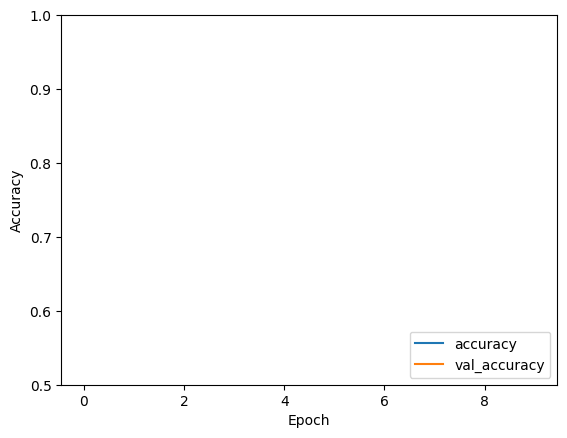

In [23]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_img_array, test_ans_array, verbose=2)

In [24]:
print(test_acc)

0.1768292635679245


Your simple CNN has achieved a test accuracy of over 70%. Not bad for a few lines of code! For another CNN style, check out the [TensorFlow 2 quickstart for experts](https://www.tensorflow.org/tutorials/quickstart/advanced) example that uses the Keras subclassing API and `tf.GradientTape`.